# Preparation

First and foremost, the proper libraries necessary for this project need to be imported. The libraries being used in this project are tensorflow, numpy, and matplotlib. Additionally, layer classes such as Dense, Flatten, Conv2D, and MaxPooling2D will be imported from tensorflow for neural network layer modeling purposes. 

In [3]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt

Next, we can import and load our dataset. The dataset that will be used is the CIFAR-10 dataset. 

In [ ]:
-The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
-There are 50000 training images and 10000 test images.
-The 10 image classes are "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", & "truck". 

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 70s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

Here we can see the shape of X_train which is 50,000 images & X_test with 10,000 images that consists of 32x32 pixel dimensions along with their 3 color channels which are RGB. 

Next, we will reshape our array "y_train" into a one dimensional array to make it simpler to apply operations and transformations to the data. 

In [8]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Now that we have reshaped our data, we want to add labels to each class. 

In [9]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Next, we want to nromalize the pixel values to a 0-1 range. This improves the training process and makes the optimization converge faster since gradient descent is more stable when working with smaller values. Instead of working with pixel values from 0-255, we will be working with pixel values ranging from 0-1, to do this you have to divide X_train & X_test by 255. 

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
#Here is an example of the pixel values ranging from 0-1
X_train[1]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Neural Network Model

Moving on, we will get started with creating our neural network. "Sequential()" will be used to create an instance of a neural network model. This is a model class that represents a linear stack of layers which will allow us to define a neural network model as a sequence of layers where the data flows sequentially from the input to output. 

In [14]:
model= Sequential()

In [17]:
#add a convolutional layer to the neural network model with 32 filters (kernels)
#each filter is responsible for learning different features of the data
#rectified linear unit (relu) is used as the activation function to introduce non-linearity
#set the size of the convolutional filter to be 3x3
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape=(32, 32, 3)))
 
#max-pooling is a downsampling operation that reduces the spatial dimensions of the feature maps produced by previous layers
#define the size of the pooling window as 2x2
model.add(MaxPooling2D(pool_size = (2,2)))

In [18]:
#add another convolutional layer to the neural network model with 64 filters (kernels)
#each filter is responsible for learning different features of the data
#rectified linear unit (relu) is used as the activation function to introduce non-linearity
#set the size of the convolutional filter to be 4x4
model.add(Conv2D(filters = 64, kernel_size = (4, 4), activation = "relu"))

#define the size of the pooling window as 2x2
model.add(MaxPooling2D(pool_size = (2,2)))

In [20]:
#takes the output of the previous layers, and converts it into a one-dimensional vector
model.add(Flatten())

#add a fully connected (dense) layer to the model
#specify the layer has 34 units (neurons), each unit will learn different patterns from the flattened input data
model.add(Dense(units = 34, activation = "relu"))

#add another fully connected layer to the model
#calculate class probabilities with softmax activation
model.add(Dense(units = 10, activation = "softmax"))

# Compile the Model

In [24]:
model.compile(
    optimizer='adam',  #specify the optimizer
    loss='sparse_categorical_crossentropy',  #specify the loss function
    metrics=['accuracy'])  #specify evaluation metrics 


# Training the Model

In [30]:
#use the "fit" method to train the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)                          


Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1467 - accuracy: 0.9474 - val_loss: 2.2916 - val_accuracy: 0.6885
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.1443 - accuracy: 0.9467 - val_loss: 2.2513 - val_accuracy: 0.6876
Epoch 3/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.1449 - accuracy: 0.9490 - val_loss: 2.3755 - val_accuracy: 0.6742
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.1326 - accuracy: 0.9515 - val_loss: 2.5079 - val_accuracy: 0.6808
Epoch 5/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.1442 - accuracy: 0.9491 - val_loss: 2.3697 - val_accuracy: 0.6853
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.1302 - accuracy: 0.9541 - val_loss: 2.5269 - val_accuracy: 0.6866
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1318 - accuracy: 0.9532 - val_loss: 2.5139 -

# After training the model over and over many times, we have an accuracy rate of 0.9562 or 95.62%.

# Making Predictions

Now that the model has been trained with an accuracy rate of 95%, we can start making predictions on our X_test dataset.

In [31]:
y_predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


For the following example, we'll be selecting the index 7 prediction.

In [32]:
#access prediction for index 7
y_predictions[7]

array([2.7375644e-16, 8.0173183e-16, 6.5953434e-05, 3.0130113e-04,
       2.1083551e-06, 1.1152581e-07, 9.9963057e-01, 2.9851586e-12,
       4.8555366e-17, 2.9367747e-17], dtype=float32)

To make the data easier to understand, we will update y_predictions to display the class indices in integers corresponding to the most likely class for each data point based on the model's prediction.

In [33]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [34]:
y_predictions

[3,
 8,
 8,
 8,
 6,
 4,
 1,
 6,
 3,
 1,
 0,
 9,
 4,
 7,
 9,
 8,
 5,
 5,
 8,
 6,
 7,
 0,
 0,
 9,
 5,
 2,
 2,
 0,
 9,
 6,
 6,
 3,
 4,
 3,
 9,
 9,
 7,
 0,
 9,
 5,
 4,
 6,
 3,
 6,
 0,
 9,
 5,
 9,
 4,
 2,
 9,
 8,
 7,
 3,
 8,
 8,
 7,
 3,
 6,
 2,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 2,
 5,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 2,
 3,
 2,
 8,
 8,
 8,
 1,
 7,
 2,
 2,
 2,
 4,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 4,
 0,
 0,
 2,
 3,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 7,
 0,
 4,
 6,
 3,
 8,
 3,
 1,
 2,
 8,
 2,
 8,
 3,
 5,
 6,
 4,
 1,
 8,
 9,
 2,
 4,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 3,
 8,
 7,
 6,
 5,
 2,
 2,
 8,
 9,
 4,
 0,
 2,
 6,
 2,
 9,
 3,
 4,
 0,
 1,
 8,
 2,
 8,
 2,
 8,
 2,
 2,
 8,
 9,
 0,
 9,
 8,
 9,
 9,
 6,
 7,
 5,
 0,
 0,
 5,
 2,
 4,
 0,
 8,
 6,
 3,
 3,
 0,
 5,
 8,
 0,
 9,
 7,
 2,
 8,
 8,
 5,
 8,
 3,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 8,
 7,
 9,
 5,
 8,
 8,
 0,
 3,
 9,
 8,
 2,
 2,
 3,
 9,
 2,
 3,
 1,
 4,
 2,
 5,
 2,
 5,
 9,
 7,
 8,
 8,
 0,
 4,
 9,
 3,
 3,
 1,
 1,
 1,
 9,
 0,
 2,
 1,
 8,
 2,
 6,


In [43]:
#reshape y_test to a one dimensial array
y_test = y_test.reshape(-1, )

# It is important to remember that: 

y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 

"airplane" = 0  
"automobile" = 1 
"bird" = 2 
"cat" = 3 
"deer" = 4 
"dog" = 5 
"frog" = 6 
"horse" = 7 
"ship" = 8 
"truck" = 9


# Create a function to display the Images and class

In [38]:
def showImage(x, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

# Test Prediction Accuray

In [52]:
#select any index from y_predictions to display the classification index 
y_predictions[15]

8

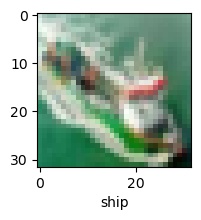

In [53]:
#show image for selected y_predictions index
showImage(X_test, y_test, 15)